# Pymaceuticals Inc.
---

### Analysis

- The Capomulin drug regimen in comparison to the other drugs is very effective. The only other drug that is possibly more effective would be Ramicane.  Ramicane and Capomulin had the smallest tumor volumes during treatment and also the smallest margin of error.  
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mice = combined_data["Mouse ID"].nunique()
mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates['Mouse ID'].unique()[0]


'g989'

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_data = combined_data[combined_data['Mouse ID'] != duplicates['Mouse ID'].unique()[0]]
clean_combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
mice = clean_combined_data["Mouse ID"].nunique()
mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_dev = clean_combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
std_er_mar = clean_combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

pd.DataFrame({"Mean by Tumor Volume":mean, 
              "Median by Tumor Volume": median,
              "Variance by Tumor Volume": variance,
              "Standard Deviation of Tumor Volume": standard_dev,
              "Standard Error Margin": std_er_mar})


,Mean by Tumor Volume,Median by Tumor Volume,Variance by Tumor Volume,Standard Deviation of Tumor Volume,Standard Error Margin
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_combined_data.groupby("Drug Regimen").agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

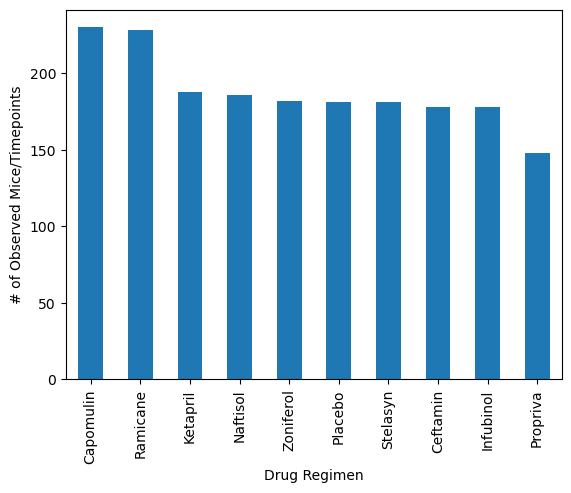

<Figure size 640x480 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_combined_data.value_counts("Drug Regimen").plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mice/Timepoints")
plt.show()
#Save plot
plt.savefig('DrugReg_Timepts_Bar.png')

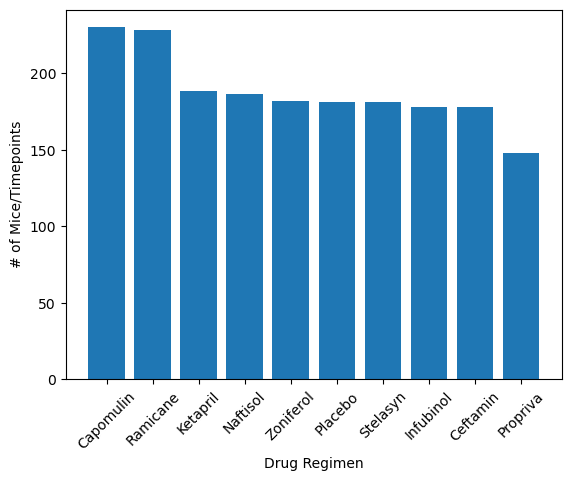

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#Create a group series using the 'Drug Regimen' column and counting the number of data points (unique mice) for each Drug Regimen 
mice_count = clean_combined_data["Drug Regimen"].value_counts()
mice_count

#create x and y axis for bar plot
x_axis = mice_count.index.values
y_axis = mice_count.values

#create the plot
plt.bar(x_axis, y_axis)

#make it more readable with labels
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice/Timepoints")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, rotation=45)
plt.show()

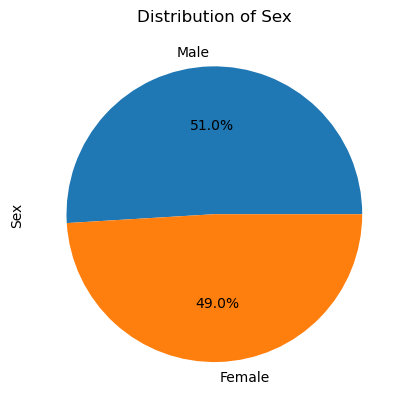

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#show the distribution of female versus male mice in the study
mice_sex = clean_combined_data["Sex"].value_counts()
mice_sex

clean_combined_data.value_counts("Sex").plot(kind="pie", autopct='%1.1f%%')
plt.title("Distribution of Sex")
plt.ylabel("Sex")

plt.show()

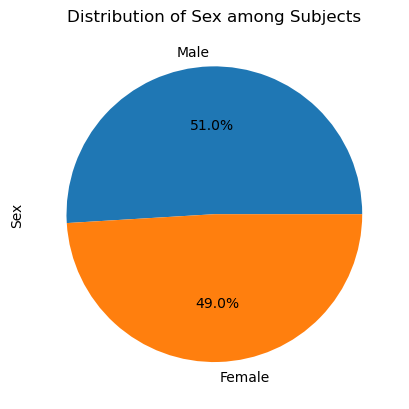

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex.plot.pie(autopct= "%1.1f%%")
plt.title('Distribution of Sex among Subjects')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Start by getting the last (greatest) timepoint for each mouse by using groupby & max
Last_Mouse = clean_combined_data.groupby('Mouse ID')['Timepoint'].max()
Last_Mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint (left merge?)
last_mouse_data = pd.merge(Last_Mouse, clean_combined_data, how='left', on=["Mouse ID", "Timepoint"])
last_mouse_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    volumes = last_mouse_data.loc[last_mouse_data["Drug Regimen"] == treatment,"Tumor Volume (mm3)"]
    # add subset 
    tumor_vol_data.append(volumes) 
    
    # Determine outliers using upper and lower bounds
    quartiles = volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outlier = volumes.loc[(volumes < lower_bound) | (volumes > upper_bound)]

    print(f"{treatment}'s  potential outliers: {outlier}")


Capomulin's  potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's  potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's  potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's  potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


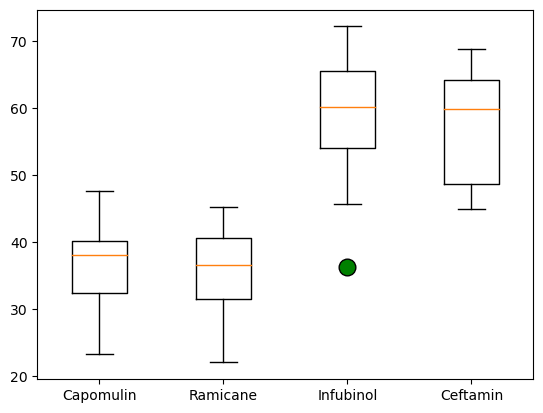

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  linestyle='none')

plt.boxplot(tumor_vol_data, labels=treatments, flierprops=flierprops)
plt.show
#Save plot
plt.savefig('box_whisk_tv.png')

## Line and Scatter Plots

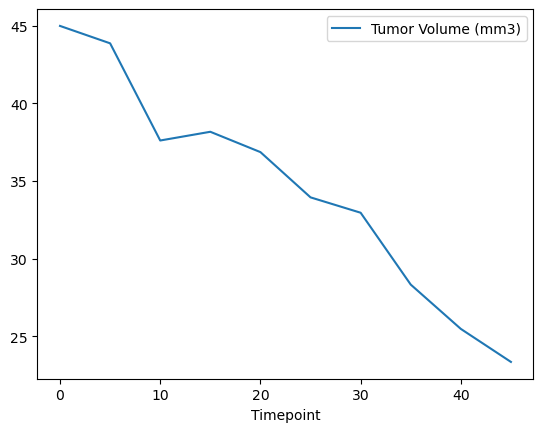

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

Capomulin_df = clean_combined_data.loc[(clean_combined_data["Drug Regimen"] == "Capomulin")&(clean_combined_data["Mouse ID"]=="s185"),:]

Capomulin_df.plot("Timepoint", "Tumor Volume (mm3)")
plt.show()
                

/var/folders/ls/s8_f754d14xcgst65tms9yz00000gn/T/ipykernel_40930/2537580736.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean = Capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)", "Weight (g)"].mean()


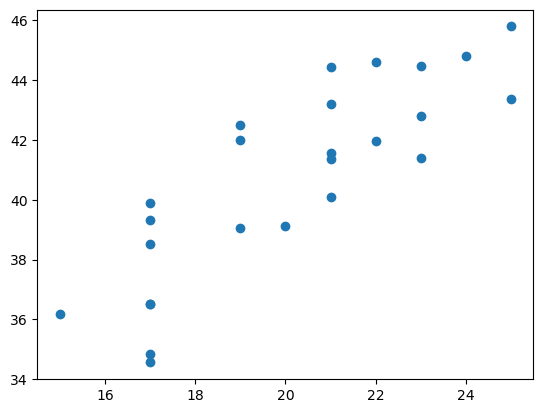

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_df = clean_combined_data.loc[clean_combined_data["Drug Regimen"] == "Capomulin",:]
mean = Capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)", "Weight (g)"].mean()
plt.scatter(mean["Weight (g)"], mean["Tumor Volume (mm3)"])
plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708723


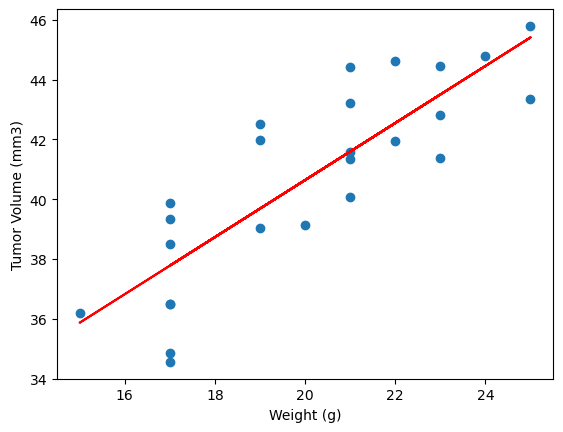

<Figure size 640x480 with 0 Axes>

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x_values = Capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()
y_values = Capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
#Save plot
plt.savefig('reg_tumorvol.png')